In [ ]:
import statistics
import random
from sklearn.linear_model import LinearRegression

# Function to get user input as a list of integers
def get_user_input(prompt):
    values = input(prompt).split()
    return [int(value) for value in values]

# Get user input for the data : This is vector!
daily_restock = get_user_input("Enter daily restock values (separated by spaces): ")
daily_visitors = get_user_input("Enter daily visitors values (separated by spaces): ")
soldout_seeds = get_user_input("Enter soldout seeds values (separated by spaces): ")
daily_my_ads = get_user_input("Enter daily My ADS values (separated by spaces): ")

# Calculate statistics
restock_mean = statistics.mean(daily_restock)
restock_var = statistics.variance(daily_restock)
restock_sd = statistics.stdev(daily_restock)

visitors_mean = statistics.mean(daily_visitors)
visitors_var = statistics.variance(daily_visitors)
visitors_sd = statistics.stdev(daily_visitors)

seeds_mean = statistics.mean(soldout_seeds)
seeds_var = statistics.variance(soldout_seeds)
seeds_sd = statistics.stdev(soldout_seeds)

ads_mean = statistics.mean(daily_my_ads)
ads_var = statistics.variance(daily_my_ads)
ads_sd = statistics.stdev(daily_my_ads)

print("Daily Restock - Mean:", restock_mean, "Variance:", restock_var, "Standard Deviation:", restock_sd)
print("Daily Visitors - Mean:", visitors_mean, "Variance:", visitors_var, "Standard Deviation:", visitors_sd)
print("Soldout Seeds - Mean:", seeds_mean, "Variance:", seeds_var, "Standard Deviation:", seeds_sd)
print("Daily My ADS - Mean:", ads_mean, "Variance:", ads_var, "Standard Deviation:", ads_sd)

# Regression model: daily visitors as a function of daily My ADS
regression_model_visitors = LinearRegression()
regression_model_visitors.fit([[ads] for ads in daily_my_ads], daily_visitors)

# Regression model: soldout seeds as a function of daily restock
regression_model_seeds = LinearRegression()
regression_model_seeds.fit([[restock] for restock in daily_restock], soldout_seeds)

# Predict new values
new_ads = get_user_input("Enter new values of daily My ADS (separated by spaces): ")
new_restock = get_user_input("Enter new values of daily restock (separated by spaces): ")

predicted_visitors = regression_model_visitors.predict([[ads] for ads in new_ads])
predicted_seeds = regression_model_seeds.predict([[restock] for restock in new_restock])

print("Predicted Visitors:", predicted_visitors)
print("Predicted Seeds:", predicted_seeds)

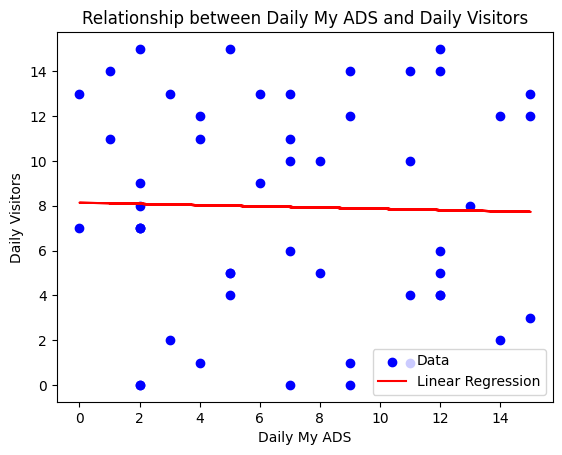

In [ ]:
import matplotlib.pyplot as plt

# Visualize daily_my_ads and daily_visitors with regression line
plt.scatter(daily_my_ads, daily_visitors, color='b', label='Data')
plt.plot(daily_my_ads, regression_model_visitors.predict([[ads] for ads in daily_my_ads]), color='r', label='Linear Regression')
plt.xlabel('Daily My ADS')
plt.ylabel('Daily Visitors')
plt.title('Relationship between Daily My ADS and Daily Visitors')
plt.legend()
plt.show()

Daily My ADS - Mean: 7.1 Variance: 21.887755102040817 Standard Deviation: 4.678435112517947
Daily Visitors - Mean: 14.06 Variance: 88.62897959183674 Standard Deviation: 9.414296553212925


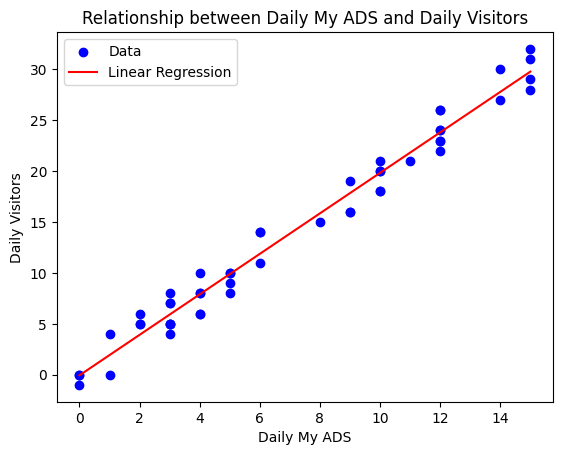

In [ ]:
import statistics
import random
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Function to generate random data
def generate_random_data(min_val, max_val, num_samples):
    return [random.randint(min_val, max_val) for _ in range(num_samples)]

# Generate random data
daily_my_ads = generate_random_data(0, 15, 50)
daily_visitors = [ads * 2 + random.randint(-2, 2) for ads in daily_my_ads]

# Calculate statistics
ads_mean = statistics.mean(daily_my_ads)
ads_var = statistics.variance(daily_my_ads)
ads_sd = statistics.stdev(daily_my_ads)

visitors_mean = statistics.mean(daily_visitors)
visitors_var = statistics.variance(daily_visitors)
visitors_sd = statistics.stdev(daily_visitors)

print("Daily My ADS - Mean:", ads_mean, "Variance:", ads_var, "Standard Deviation:", ads_sd)
print("Daily Visitors - Mean:", visitors_mean, "Variance:", visitors_var, "Standard Deviation:", visitors_sd)

# Regression model: daily visitors as a function of daily My ADS
regression_model_visitors = LinearRegression()
regression_model_visitors.fit([[ads] for ads in daily_my_ads], daily_visitors)

# Generate data for plotting regression line
x_values = np.linspace(0, 15, 100)
y_values = regression_model_visitors.predict([[x] for x in x_values])

# Visualize daily_my_ads and daily_visitors with regression line
plt.scatter(daily_my_ads, daily_visitors, color='b', label='Data')
plt.plot(x_values, y_values, color='r', label='Linear Regression')
plt.xlabel('Daily My ADS')
plt.ylabel('Daily Visitors')
plt.title('Relationship between Daily My ADS and Daily Visitors')
plt.legend()
plt.show()

Daily My ADS - Mean: 7.58 Variance: 25.309795918367346 Standard Deviation: 5.030884208403862
Daily Visitors - Mean: 15.26 Variance: 101.7065306122449 Standard Deviation: 10.084965573180947


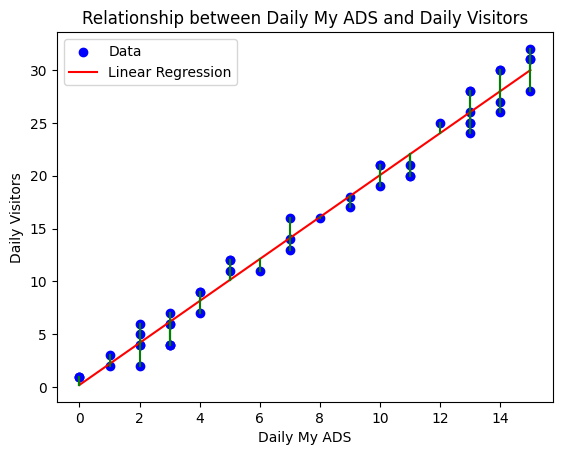

In [ ]:
import statistics
import random
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Function to generate random data
def generate_random_data(min_val, max_val, num_samples):
    return [random.randint(min_val, max_val) for _ in range(num_samples)]

# Generate random data
daily_my_ads = generate_random_data(0, 15, 50)
daily_visitors = [ads * 2 + random.randint(-2, 2) for ads in daily_my_ads]

# Calculate statistics
ads_mean = statistics.mean(daily_my_ads)
ads_var = statistics.variance(daily_my_ads)
ads_sd = statistics.stdev(daily_my_ads)

visitors_mean = statistics.mean(daily_visitors)
visitors_var = statistics.variance(daily_visitors)
visitors_sd = statistics.stdev(daily_visitors)

print("Daily My ADS - Mean:", ads_mean, "Variance:", ads_var, "Standard Deviation:", ads_sd)
print("Daily Visitors - Mean:", visitors_mean, "Variance:", visitors_var, "Standard Deviation:", visitors_sd)

# Regression model: daily visitors as a function of daily My ADS
regression_model_visitors = LinearRegression()
regression_model_visitors.fit([[ads] for ads in daily_my_ads], daily_visitors)

# Generate data for plotting regression line
x_values = np.linspace(0, 15, 100)
y_values = regression_model_visitors.predict([[x] for x in x_values])

# Calculate residuals
residuals = [actual - predicted for actual, predicted in zip(daily_visitors, regression_model_visitors.predict([[ads] for ads in daily_my_ads]))]

# Visualize daily_my_ads and daily_visitors with residuals
plt.scatter(daily_my_ads, daily_visitors, color='b', label='Data')
plt.plot(x_values, y_values, color='r', label='Linear Regression')
plt.xlabel('Daily My ADS')
plt.ylabel('Daily Visitors')
plt.title('Relationship between Daily My ADS and Daily Visitors')

# Add residual lines
for x, y, residual in zip(daily_my_ads, daily_visitors, residuals):
    plt.plot([x, x], [y, y - residual], color='g')

plt.legend()
plt.show()
